In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score, accuracy_score,precision_score, recall_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [5]:
df_main = pd.read_csv('superstore_data.csv')
df_main

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


Feature selection/transformation

Adding features --> Purchase Frequency, Average Order Value

In [6]:
df_main.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [7]:
df_main.dropna(inplace=True)

In [8]:
#frequency
df_main['OvrFrequency'] = df_main['NumWebPurchases'] + df_main['NumCatalogPurchases'] + df_main['NumStorePurchases'] 
#Avg order value
df_main['AvgOrderValue'] = (df_main['MntWines'] + df_main['MntFruits'] + df_main['MntMeatProducts'] + df_main['MntFishProducts'] + df_main['MntSweetProducts'] + df_main['MntGoldProds'])/df_main['NumWebPurchases'] + df_main['NumCatalogPurchases'] + df_main['NumStorePurchases'] + df_main['NumDealsPurchases']
#pct income spent
df_main['pct_income_spent'] = df_main['AvgOrderValue']/df_main['Income']
#deals per purchase
df_main['DealsPerPurchase'] = df_main['NumDealsPurchases']/df_main['OvrFrequency']

In [9]:
df_main[df_main['DealsPerPurchase'].isnull()].AvgOrderValue

456     inf
1291    inf
1826    inf
1925    inf
Name: AvgOrderValue, dtype: float64

In [10]:
#age as of enrollment
from datetime import datetime

df_main['precise_date'] = pd.to_datetime(df_main['Dt_Customer'])
df_main['age'] = df_main['precise_date'].dt.year - df_main['Year_Birth']

In [11]:
df_main.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
OvrFrequency           0
AvgOrderValue          0
pct_income_spent       0
DealsPerPurchase       4
precise_date           0
age                    0
dtype: int64

In [12]:
df_main.dropna(inplace = True)

In [13]:
df_main.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
OvrFrequency           0
AvgOrderValue          0
pct_income_spent       0
DealsPerPurchase       0
precise_date           0
age                    0
dtype: int64

In [11]:
df_main[df_main['DealsPerPurchase'].isnull()]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,OvrFrequency,AvgOrderValue,pct_income_spent,DealsPerPurchase,precise_date,age


Finalising the feature set

In [14]:
##dropping unecessary vars
df_main.drop(['Id', 'Year_Birth','Dt_Customer','precise_date'], axis=1,inplace=True)

In [15]:
df_main.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'OvrFrequency', 'AvgOrderValue', 'pct_income_spent', 'DealsPerPurchase',
       'age'],
      dtype='object')

In [16]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   MntWines             2212 non-null   int64  
 7   MntFruits            2212 non-null   int64  
 8   MntMeatProducts      2212 non-null   int64  
 9   MntFishProducts      2212 non-null   int64  
 10  MntSweetProducts     2212 non-null   int64  
 11  MntGoldProds         2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

In [17]:
df_main[['Response']].value_counts()/(1883+333) #15% of class 1 implies imbalance

Response
0           0.847924
1           0.150271
dtype: float64

Label Encoding

In [18]:
# Select object columns
#object_columns = df_merged.select_dtypes(include=['object']).columns.tolist()
object_columns = ['Education','Marital_Status','Complain']
dummy_df = pd.get_dummies(df_main, columns=object_columns)

In [19]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2212 non-null   float64
 1   Kidhome                  2212 non-null   int64  
 2   Teenhome                 2212 non-null   int64  
 3   Recency                  2212 non-null   int64  
 4   MntWines                 2212 non-null   int64  
 5   MntFruits                2212 non-null   int64  
 6   MntMeatProducts          2212 non-null   int64  
 7   MntFishProducts          2212 non-null   int64  
 8   MntSweetProducts         2212 non-null   int64  
 9   MntGoldProds             2212 non-null   int64  
 10  NumDealsPurchases        2212 non-null   int64  
 11  NumWebPurchases          2212 non-null   int64  
 12  NumCatalogPurchases      2212 non-null   int64  
 13  NumStorePurchases        2212 non-null   int64  
 14  NumWebVisitsMonth       

Train-Test Split

Oversampling using smote

In [50]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install -U scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/08/5d/e5acecd6e99a6b656e42e7a7b18284e2f9c9f512e8ed6979e1e75d25f05f/scikit_learn-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 15.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 6.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you 

In [20]:
dummy_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
dummy_df.isnull().sum()

Income                      0
Kidhome                     0
Teenhome                    0
Recency                     0
MntWines                    0
MntFruits                   0
MntMeatProducts             0
MntFishProducts             0
MntSweetProducts            0
MntGoldProds                0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
Response                    0
OvrFrequency                0
AvgOrderValue              44
pct_income_spent           44
DealsPerPurchase            2
age                         0
Education_2n Cycle          0
Education_Basic             0
Education_Graduation        0
Education_Master            0
Education_PhD               0
Marital_Status_Absurd       0
Marital_Status_Alone        0
Marital_Status_Divorced     0
Marital_Status_Married      0
Marital_Status_Single       0
Marital_Status_Together     0
Marital_Status_Widow        0
Marital_St

In [22]:
dummy_df.dropna(inplace=True)

In [23]:
from sklearn.model_selection import train_test_split
X = dummy_df.drop('Response',axis = 1)
y = dummy_df['Response']

Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.32226927, -0.81983225, -0.93280998, ..., -0.03038686,
         0.09649346, -0.09649346],
       [ 0.18921166, -0.81983225, -0.93280998, ..., -0.03038686,
         0.09649346, -0.09649346],
       [ 0.6047968 , -0.81983225,  0.91070144, ..., -0.03038686,
         0.09649346, -0.09649346],
       ...,
       [-0.25108152,  1.04718069, -0.93280998, ..., -0.03038686,
         0.09649346, -0.09649346],
       [ 0.54566087, -0.81983225, -0.93280998, ..., -0.03038686,
         0.09649346, -0.09649346],
       [ 1.73213685, -0.81983225,  2.75421287, ..., -0.03038686,
         0.09649346, -0.09649346]])

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.4)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [26]:
y_resampled.value_counts()/(1836+734)

0    0.714397
1    0.285603
Name: Response, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, random_state=104,  test_size=0.25,  shuffle=True)

In [28]:
X_test.shape

(643, 35)

In [66]:
X_train.shape

(1927, 35)

In [67]:
X.shape

(2168, 35)

In [68]:
643/(643+1927)

0.2501945525291829

Grid Search - Logistic Regression

In [54]:
# Initialize Logistic classifier
logis = LogisticRegression()

# Define the parameter grid for SVM
param_grid = {
    # 'C': [0.1, 0.5, 1, 5, 10, 100, 1000],  # Regularization parameter
    'C': 10**np.linspace(-4, 4, 100),  # Regularization parameter
}

# Define custom scorer functions for each target class
f1_score_0 = make_scorer(f1_score, pos_label=0)
f1_score_1 = make_scorer(f1_score, pos_label=1)
test_accuracy = make_scorer(accuracy_score)

# Set up the scoring parameter as a dictionary with custom scorers
scoring = {'f1_score_0': f1_score_0, 'f1_score_1': f1_score_1, 'test_accuracy': test_accuracy}

# Setup GridSearchCV with the F1 score for class 0 as the scoring metric
grid_search_log = GridSearchCV(logis, param_grid=param_grid, scoring=scoring,
                           cv=3, n_jobs=-1, verbose=3, refit='f1_score_1')

# Fit the GridSearchCV to find the best hyperparameters
grid_search_log.fit(X_train, y_train)

# After fitting, the best model can be accessed with grid_search.best_estimator_
best_model_log = grid_search_log.best_estimator_

# Get the best F1 score for class 1
best_f1_score_1_log = grid_search_log.best_score_

# Print the results
print("Best model parameters: ", grid_search_log.best_params_)
print("Best F1 score for class 1: ", best_f1_score_1_log)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

Best model parameters:  {'C': 291.5053062825182}
Best F1 score for class 1:  0.43473627821453903


ogistic-regression
  n_iter_i = _check_optimize_result(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Scaling to reach convergence and find better accuracy

In [47]:
log_model = LogisticRegression(C=0.004977023564332114)
# Train the model
log_model.fit(X_train, y_train)

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.004977023564332114)

In [48]:


y_pred_log = log_model.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[435  21]
 [108  33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       456
           1       0.61      0.23      0.34       141

    accuracy                           0.78       597
   macro avg       0.71      0.59      0.60       597
weighted avg       0.76      0.78      0.75       597



Grid Search - Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RF classifier
rf = RandomForestClassifier()

# Define the parameter grid for RF
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}
# param_grid = {
#     # 'C': [0.1, 0.5, 1, 5, 10, 100, 1000],  # Regularization parameter
#     'C': 10**np.linspace(-4, 4, 100),  # Regularization parameter
# }

# Define custom scorer functions for each target class
f1_score_0 = make_scorer(f1_score, pos_label=0)
f1_score_1 = make_scorer(f1_score, pos_label=1)
test_accuracy = make_scorer(accuracy_score)

# Set up the scoring parameter as a dictionary with custom scorers
scoring = {'f1_score_0': f1_score_0, 'f1_score_1': f1_score_1, 'test_accuracy': test_accuracy}

# Setup GridSearchCV with the F1 score for class 0 as the scoring metric
grid_search_log = GridSearchCV(rf, param_grid=param_grid, scoring=scoring,
                           cv=3, n_jobs=-1, verbose=3, refit='f1_score_1')

# Fit the GridSearchCV to find the best hyperparameters
grid_search_log.fit(X_train, y_train)

# After fitting, the best model can be accessed with grid_search.best_estimator_
best_model_log = grid_search_log.best_estimator_

# Get the best F1 score for class 1
best_f1_score_1_log = grid_search_log.best_score_

# Print the results
print("Best model parameters: ", grid_search_log.best_params_)
print("Best F1 score for class 1: ", best_f1_score_1_log)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constra

Best model parameters:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score for class 1:  0.7666465393551576


In [56]:
rf_model = RandomForestClassifier(max_depth = 30, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30)

In [57]:


y_pred_log = rf_model.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[459  16]
 [ 53 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       475
           1       0.88      0.68      0.77       168

    accuracy                           0.89       643
   macro avg       0.89      0.83      0.85       643
weighted avg       0.89      0.89      0.89       643



Identifying features that model finds key to split 0 and 1

In [58]:
importances = rf_model.feature_importances_
importances

array([0.06671064, 0.00541839, 0.04203487, 0.09769552, 0.07035719,
       0.03434586, 0.06340944, 0.03673692, 0.03927692, 0.06277368,
       0.02280121, 0.02266252, 0.02831876, 0.05011006, 0.02872168,
       0.02663129, 0.04726005, 0.0482996 , 0.05307315, 0.03649532,
       0.00572235, 0.00300827, 0.02064578, 0.00748887, 0.0072347 ,
       0.00013583, 0.00054561, 0.00391662, 0.03052663, 0.0072223 ,
       0.02589374, 0.0027327 , 0.00092609, 0.00064742, 0.00021999])

In [59]:
feature_names = X.columns
feature_importances = dict(zip(feature_names, importances))

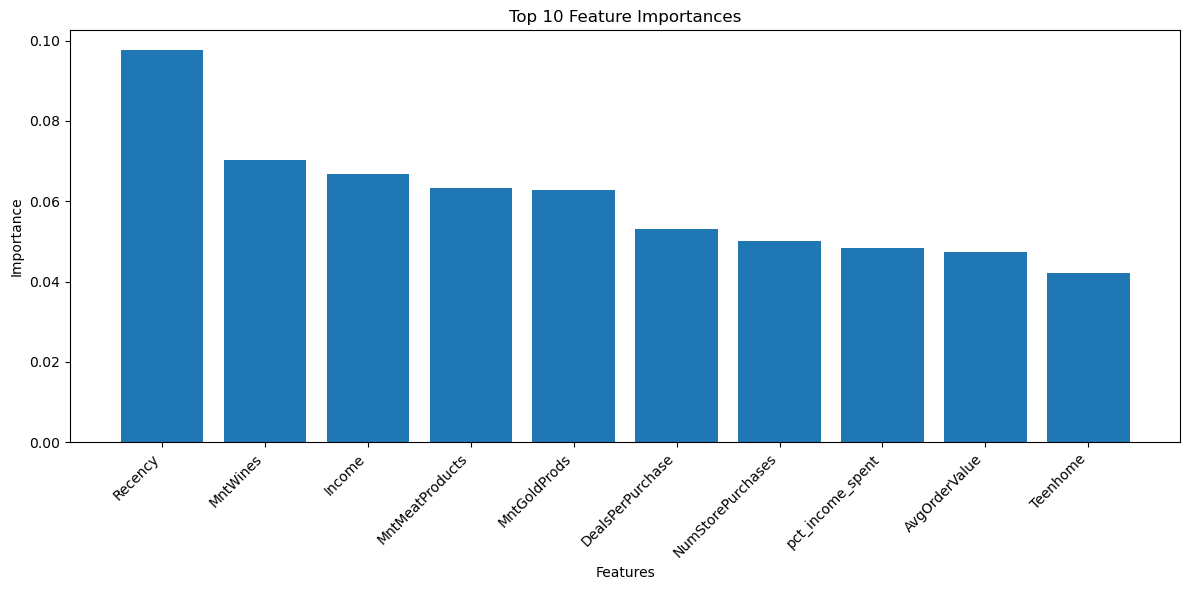

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting the feature importances in descending order
indices = np.argsort(importances)[::-1]
top_10_indices = indices[:10]

# Extracting the names and importance values of these top 10 features.
top_10_feature_names = [feature_names[i] for i in top_10_indices]
top_10_importances = importances[top_10_indices]


# Creating a bar plot
plt.figure(figsize=(12, 6))  # Width, Height in inches

# Title and bar plot
plt.title("Top 10 Feature Importances")
plt.bar(range(10), top_10_importances, align='center')

# Rotate the feature names for better visibility
plt.xticks(range(10), top_10_feature_names, rotation=45, ha='right')

# Adding labels for clarity
plt.xlabel('Features')
plt.ylabel('Importance')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Analysing important features to interpret model for business recommendations

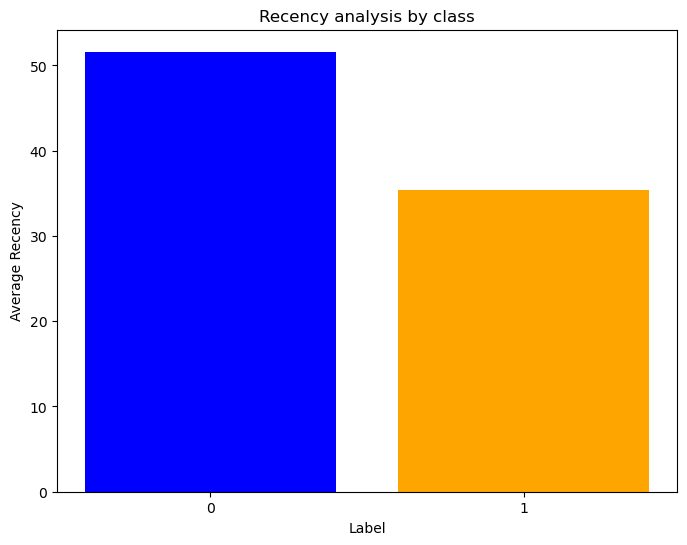

In [61]:
average_times = dummy_df.groupby('Response')['Recency'].mean()

plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.bar(average_times.index, average_times.values, color=['blue', 'orange'])  # You can choose different colors

# Adding labels and title for clarity
plt.xlabel('Label')
plt.ylabel('Average Recency')
plt.title('Recency analysis by class')
plt.xticks([0, 1])  # Assuming labels are 0 and 1

# Show the plot
plt.show()

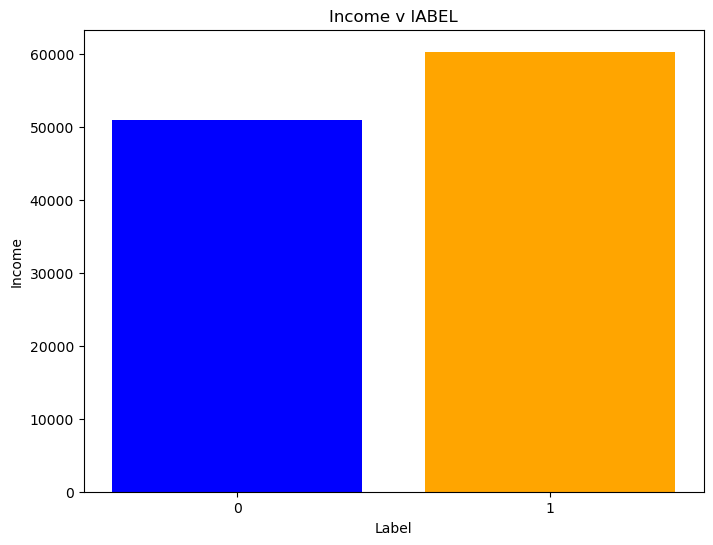

In [63]:
average_times = dummy_df.groupby('Response')['Income'].mean()

plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.bar(average_times.index, average_times.values, color=['blue', 'orange'])  # You can choose different colors

# Adding labels and title for clarity
plt.xlabel('Label')
plt.ylabel('Income')
plt.title('Income v lABEL')
plt.xticks([0, 1])  # Assuming labels are 0 and 1

# Show the plot
plt.show()

 Grid Search - Knn

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize knn classifier
knn = KNeighborsClassifier()

# Define the parameter grid for RF
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
# param_grid = {
#     # 'C': [0.1, 0.5, 1, 5, 10, 100, 1000],  # Regularization parameter
#     'C': 10**np.linspace(-4, 4, 100),  # Regularization parameter
# }

# Define custom scorer functions for each target class
f1_score_0 = make_scorer(f1_score, pos_label=0)
f1_score_1 = make_scorer(f1_score, pos_label=1)
test_accuracy = make_scorer(accuracy_score)

# Set up the scoring parameter as a dictionary with custom scorers
scoring = {'f1_score_0': f1_score_0, 'f1_score_1': f1_score_1, 'test_accuracy': test_accuracy}

# Setup GridSearchCV with the F1 score for class 0 as the scoring metric
grid_search_log = GridSearchCV(knn, param_grid=param_grid, scoring=scoring,
                           cv=3, n_jobs=-1, verbose=3, refit='f1_score_1')

# Fit the GridSearchCV to find the best hyperparameters
grid_search_log.fit(X_train, y_train)

# After fitting, the best model can be accessed with grid_search.best_estimator_
best_model_log = grid_search_log.best_estimator_

# Get the best F1 score for class 1
best_f1_score_1_log = grid_search_log.best_score_

# Print the results
print("Best model parameters: ", grid_search_log.best_params_)
print("Best F1 score for class 1: ", best_f1_score_1_log)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best model parameters:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best F1 score for class 1:  0.6504667685839504


In [66]:
knn_model = KNeighborsClassifier(n_neighbors = 5, p = 1, weights = 'distance')
# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [67]:
y_pred_log = knn_model.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[412  63]
 [ 38 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       475
           1       0.67      0.77      0.72       168

    accuracy                           0.84       643
   macro avg       0.79      0.82      0.81       643
weighted avg       0.85      0.84      0.85       643



Grid search - XGB

In [68]:
!pip install xgboost

In [69]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize knn classifier
xgb_classifier = XGBClassifier(random_state=42)

#customer score dictionary
scorers = {
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score)
}


# Define the parameter grid for RF
param_grid = {
    'n_estimators': [50, 100, 200], # Number of boosting rounds, default=100
    'max_depth': [3, 5, 7], # default=6
    'learning_rate': [0.01, 0.1, 0.2] # default=0.3
}

# Define custom scorer functions for each target class
# f1_score_0 = make_scorer(f1_score, pos_label=0)
# f1_score_1 = make_scorer(f1_score, pos_label=1)
# test_accuracy = make_scorer(accuracy_score)

# # Set up the scoring parameter as a dictionary with custom scorers
# scoring = {'f1_score_0': f1_score_0, 'f1_score_1': f1_score_1, 'test_accuracy': test_accuracy}

# Setup GridSearchCV with the F1 score for class 0 as the scoring metric
grid_search_log = GridSearchCV(xgb_classifier, param_grid=param_grid, scoring=scorers,
                           cv=3, n_jobs=-1, verbose=3, refit='f1')

# Fit the GridSearchCV to find the best hyperparameters
grid_search_log.fit(X_train, y_train)

# After fitting, the best model can be accessed with grid_search.best_estimator_
best_model_log = grid_search_log.best_estimator_

# Get the best F1 score for class 1
best_f1_score_1_log = grid_search_log.best_score_

# Print the results
print("Best model parameters: ", grid_search_log.best_params_)
print("Best F1 score for class 1: ", best_f1_score_1_log)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best model parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best F1 score for class 1:  0.7867396686515541


In [70]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Fixed parameters
fixed_params = {
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.2
}

# Hyperparameters to tune
param_grid = {
    'min_child_weight': [1, 5, 10], # default=1
    'min_samples_split': [2, 5, 10], # default=2
    'min_samples_leaf': [1, 2, 4], # default=1
    'max_features': ['auto', 'sqrt'], # default='auto'
    'scale_pos_weight': [1, 10, 25], # default=1
    'alpha': [0, 0.1, 0.5, 1] # default=0
}

# Updating XGBoost Classifier with fixed parameters
xgb_classifier_fixed = XGBClassifier(**fixed_params, random_state=42)

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_classifier_fixed,
                           param_grid=param_grid,
                           scoring='f1',  # focusing on F1 score for imbalanced classification
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_xgb_params = grid_search.best_params_
print("Best Parameters:", best_xgb_params)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:20] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:20] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:21] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:22] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:22] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:23] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:23] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:24] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:24] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:25] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:25] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:26] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:26] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:27] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:28] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:28] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:29] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:29] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:30] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:31] WARNING: /Users/runner/work/xgb

[CV 1/3] END C=0.00012045035402587823; f1_score_0: (test=0.830) f1_score_1: (test=0.406) test_accuracy: (test=0.736) total time=   0.1s
[CV 2/3] END C=0.00021049041445120198; f1_score_0: (test=0.828) f1_score_1: (test=0.430) test_accuracy: (test=0.735) total time=   0.1s
[CV 1/3] END C=0.000774263682681127; f1_score_0: (test=0.828) f1_score_1: (test=0.394) test_accuracy: (test=0.733) total time=   0.1s
[CV 2/3] END C=0.0013530477745798076; f1_score_0: (test=0.829) f1_score_1: (test=0.431) test_accuracy: (test=0.737) total time=   0.1s
[CV 1/3] END C=0.002848035868435802; f1_score_0: (test=0.830) f1_score_1: (test=0.391) test_accuracy: (test=0.734) total time=   0.1s
[CV 3/3] END C=0.004977023564332114; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.1s
[CV 2/3] END C=0.022051307399030457; f1_score_0: (test=0.827) f1_score_1: (test=0.433) test_accuracy: (test=0.735) total time=   0.1s
[CV 3/3] END C=0.022051307399030457; f1_score_0: (test=0.

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:32] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:32] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:33] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:34] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:34] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:35] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:36] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:36] WARNING: /Users/runner/work/xgb

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:38] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:39] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:40] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:41] WARNING: /Users/runner/work/xgb

[CV 3/3] END C=0.0001747528400007683; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.1s
[CV 2/3] END C=0.0003678379771828634; f1_score_0: (test=0.825) f1_score_1: (test=0.427) test_accuracy: (test=0.732) total time=   0.1s
[CV 3/3] END C=0.0006428073117284319; f1_score_0: (test=0.849) f1_score_1: (test=0.453) test_accuracy: (test=0.763) total time=   0.1s
[CV 2/3] END C=0.0016297508346206436; f1_score_0: (test=0.829) f1_score_1: (test=0.444) test_accuracy: (test=0.738) total time=   0.1s
[CV 2/3] END C=0.003430469286314919; f1_score_0: (test=0.829) f1_score_1: (test=0.440) test_accuracy: (test=0.738) total time=   0.1s
[CV 3/3] END C=0.007220809018385471; f1_score_0: (test=0.848) f1_score_1: (test=0.452) test_accuracy: (test=0.762) total time=   0.1s
[CV 1/3] END C=0.026560877829466867; f1_score_0: (test=0.831) f1_score_1: (test=0.397) test_accuracy: (test=0.736) total time=   0.1s
[CV 2/3] END C=0.026560877829466867; f1_score_0: (test=0.8

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:41] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgb

[CV 3/3] END C=0.000145082877849594; f1_score_0: (test=0.847) f1_score_1: (test=0.442) test_accuracy: (test=0.760) total time=   0.1s
[CV 2/3] END C=0.0003053855508833416; f1_score_0: (test=0.824) f1_score_1: (test=0.421) test_accuracy: (test=0.731) total time=   0.1s
[CV 2/3] END C=0.0005336699231206312; f1_score_0: (test=0.826) f1_score_1: (test=0.428) test_accuracy: (test=0.734) total time=   0.1s
[CV 3/3] END C=0.0016297508346206436; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.1s
[CV 3/3] END C=0.003430469286314919; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.0s
[CV 2/3] END C=0.007220809018385471; f1_score_0: (test=0.830) f1_score_1: (test=0.445) test_accuracy: (test=0.740) total time=   0.1s
[CV 3/3] END C=0.026560877829466867; f1_score_0: (test=0.848) f1_score_1: (test=0.452) test_accuracy: (test=0.762) total time=   0.1s
[CV 1/3] END C=0.03199267137797385; f1_score_0: (test=0.826

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgb

) f1_score_1: (test=0.401) test_accuracy: (test=0.731) total time=   0.0s
[CV 2/3] END C=0.09770099572992257; f1_score_0: (test=0.824) f1_score_1: (test=0.425) test_accuracy: (test=0.731) total time=   0.0s
[CV 3/3] END C=0.09770099572992257; f1_score_0: (test=0.850) f1_score_1: (test=0.468) test_accuracy: (test=0.766) total time=   0.0s
[CV 3/3] END C=1.0974987654930568; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.1s
[CV 1/3] END C=1.3219411484660315; f1_score_0: (test=0.829) f1_score_1: (test=0.400) test_accuracy: (test=0.734) total time=   0.0s
[CV 2/3] END C=1.3219411484660315; f1_score_0: (test=0.830) f1_score_1: (test=0.441) test_accuracy: (test=0.740) total time=   0.0s
[CV 3/3] END C=1.3219411484660315; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.0s
[CV 1/3] END C=14.849682622544666; f1_score_0: (test=0.830) f1_score_1: (test=0.401) test_accuracy: (test=0.736) total time=   0.0s


arn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:42] WARNING:

[CV 2/3] END C=14.849682622544666; f1_score_0: (test=0.825) f1_score_1: (test=0.427) test_accuracy: (test=0.732) total time=   0.0s
[CV 3/3] END C=14.849682622544666; f1_score_0: (test=0.846) f1_score_1: (test=0.444) test_accuracy: (test=0.759) total time=   0.1s
[CV 1/3] END C=17.886495290574352; f1_score_0: (test=0.829) f1_score_1: (test=0.400) test_accuracy: (test=0.734) total time=   0.1s
[CV 1/3] END C=291.5053062825182; f1_score_0: (test=0.830) f1_score_1: (test=0.406) test_accuracy: (test=0.736) total time=   0.1s
[CV 2/3] END C=291.5053062825182; f1_score_0: (test=0.830) f1_score_1: (test=0.441) test_accuracy: (test=0.740) total time=   0.1s
[CV 3/3] END C=291.5053062825182; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.1s
[CV 1/3] END C=351.11917342151344; f1_score_0: (test=0.829) f1_score_1: (test=0.400) test_accuracy: (test=0.734) total time=   0.1s
[CV 2/3] END C=1873.8174228603868; f1_score_0: (test=0.827) f1_score_1: (test=0

[CV 1/3] END C=0.0001747528400007683; f1_score_0: (test=0.829) f1_score_1: (test=0.400) test_accuracy: (test=0.734) total time=   0.1s
[CV 3/3] END C=0.0003053855508833416; f1_score_0: (test=0.846) f1_score_1: (test=0.444) test_accuracy: (test=0.759) total time=   0.1s
[CV 3/3] END C=0.0005336699231206312; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.0s
[CV 2/3] END C=0.0011233240329780276; f1_score_0: (test=0.829) f1_score_1: (test=0.431) test_accuracy: (test=0.737) total time=   0.1s
[CV 2/3] END C=0.002848035868435802; f1_score_0: (test=0.824) f1_score_1: (test=0.425) test_accuracy: (test=0.731) total time=   0.1s
[CV 2/3] END C=0.004977023564332114; f1_score_0: (test=0.827) f1_score_1: (test=0.437) test_accuracy: (test=0.735) total time=   0.1s
[CV 2/3] END C=0.03199267137797385; f1_score_0: (test=0.825) f1_score_1: (test=0.427) test_accuracy: (test=0.732) total time=   0.0s
[CV 3/3] END C=0.03199267137797385; f1_score_0: (test=0.849

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:43] WARNING: /Users/runner/work/xgb

) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.0s
[CV 1/3] END C=0.1176811952434999; f1_score_0: (test=0.829) f1_score_1: (test=0.400) test_accuracy: (test=0.734) total time=   0.0s
[CV 2/3] END C=0.1176811952434999; f1_score_0: (test=0.824) f1_score_1: (test=0.421) test_accuracy: (test=0.731) total time=   0.0s
[CV 1/3] END C=0.7564633275546291; f1_score_0: (test=0.829) f1_score_1: (test=0.400) test_accuracy: (test=0.734) total time=   0.0s
[CV 2/3] END C=0.7564633275546291; f1_score_0: (test=0.828) f1_score_1: (test=0.439) test_accuracy: (test=0.737) total time=   0.0s
[CV 3/3] END C=0.7564633275546291; f1_score_0: (test=0.846) f1_score_1: (test=0.454) test_accuracy: (test=0.760) total time=   0.0s
[CV 1/3] END C=0.9111627561154896; f1_score_0: (test=0.828) f1_score_1: (test=0.394) test_accuracy: (test=0.733) total time=   0.0s
[CV 3/3] END C=4.862601580065354; f1_score_0: (test=0.841) f1_score_1: (test=0.424) test_accuracy: (test=0.751) total time=   0.0s
[CV

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:44] WARNING: /Users/runner/work/xgb

[CV 2/3] END C=0.00012045035402587823; f1_score_0: (test=0.828) f1_score_1: (test=0.426) test_accuracy: (test=0.735) total time=   0.1s
[CV 2/3] END C=0.00025353644939701115; f1_score_0: (test=0.824) f1_score_1: (test=0.421) test_accuracy: (test=0.731) total time=   0.1s
[CV 1/3] END C=0.0006428073117284319; f1_score_0: (test=0.829) f1_score_1: (test=0.400) test_accuracy: (test=0.734) total time=   0.1s
[CV 1/3] END C=0.0013530477745798076; f1_score_0: (test=0.824) f1_score_1: (test=0.399) test_accuracy: (test=0.728) total time=   0.1s
[CV 3/3] END C=0.002364489412645407; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.1s
[CV 1/3] END C=0.007220809018385471; f1_score_0: (test=0.831) f1_score_1: (test=0.393) test_accuracy: (test=0.736) total time=   0.1s
[CV 3/3] END C=0.018307382802953697; f1_score_0: (test=0.849) f1_score_1: (test=0.457) test_accuracy: (test=0.763) total time=   0.1s
[CV 1/3] END C=0.022051307399030457; f1_score_0: (test=0

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:44] WARNING: /Users/runner/work/xgb

[CV 3/3] END C=0.0001; f1_score_0: (test=0.847) f1_score_1: (test=0.442) test_accuracy: (test=0.760) total time=   0.1s
[CV 3/3] END C=0.0003678379771828634; f1_score_0: (test=0.847) f1_score_1: (test=0.450) test_accuracy: (test=0.760) total time=   0.1s
[CV 2/3] END C=0.000774263682681127; f1_score_0: (test=0.825) f1_score_1: (test=0.427) test_accuracy: (test=0.732) total time=   0.1s
[CV 1/3] END C=0.0016297508346206436; f1_score_0: (test=0.827) f1_score_1: (test=0.393) test_accuracy: (test=0.731) total time=   0.1s
[CV 1/3] END C=0.003430469286314919; f1_score_0: (test=0.830) f1_score_1: (test=0.387) test_accuracy: (test=0.734) total time=   0.1s
[CV 3/3] END C=0.005994842503189409; f1_score_0: (test=0.847) f1_score_1: (test=0.450) test_accuracy: (test=0.760) total time=   0.1s
[CV 1/3] END C=0.018307382802953697; f1_score_0: (test=0.830) f1_score_1: (test=0.406) test_accuracy: (test=0.736) total time=   0.0s
[CV 2/3] END C=0.018307382802953697; f1_score_0: (test=0.826) f1_score_1: 

[CV 3/3] END C=0.00012045035402587823; f1_score_0: (test=0.849) f1_score_1: (test=0.449) test_accuracy: (test=0.763) total time=   0.1s
[CV 1/3] END C=0.0003678379771828634; f1_score_0: (test=0.829) f1_score_1: (test=0.400) test_accuracy: (test=0.734) total time=   0.1s
[CV 2/3] END C=0.0006428073117284319; f1_score_0: (test=0.824) f1_score_1: (test=0.421) test_accuracy: (test=0.731) total time=   0.1s
[CV 1/3] END C=0.0011233240329780276; f1_score_0: (test=0.827) f1_score_1: (test=0.411) test_accuracy: (test=0.733) total time=   0.1s
[CV 1/3] END C=0.002364489412645407; f1_score_0: (test=0.830) f1_score_1: (test=0.396) test_accuracy: (test=0.734) total time=   0.1s
[CV 2/3] END C=0.0041320124001153384; f1_score_0: (test=0.830) f1_score_1: (test=0.436) test_accuracy: (test=0.738) total time=   0.1s
[CV 3/3] END C=0.008697490026177835; f1_score_0: (test=0.847) f1_score_1: (test=0.450) test_accuracy: (test=0.760) total time=   0.1s
[CV 1/3] END C=0.010476157527896652; f1_score_0: (test=0

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:45] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:46] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:46] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:47] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:48] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:49] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:49] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:50] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:51] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:53] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:53] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:54] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:55] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:55] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:56] WARNING: /Users/runner/work/xgb

[CV] END alpha=0, max_features=auto, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=auto, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.3s
[CV] END alpha=0, max_features=auto, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=auto, min_child_weight=1, min_samples_leaf=4, min_samples_split=2, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=auto, min_child_weight=1, min_samples_leaf=4, min_samples_split=2, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=aut

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:57] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:58] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:59] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:29:59] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:00] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:01] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:02] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:02] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:03] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:04] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:04] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:05] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:06] WARNING: /Users/runner/work/xgb

[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=2, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=2, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=4, min_samples_split=2, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=4, min_samples_split=2, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=4, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt,

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:07] WARNING: /Users/runner/work/xgb

 min_child_weight=5, min_samples_leaf=4, min_samples_split=5, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=4, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_sam

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:07] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:08] WARNING: /Users/runner/work/xgb

[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=4, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=5, min_samples_leaf=4, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:08] WARNING: /Users/runner/work/xgb

[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=2, min_samples_split=5, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=2, min_samples_split=5, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=4, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_fea

ng: [10:30:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "mi

[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=4, min_samples_split=2, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=4, min_samples_split=2, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=4, min_samples_split=10, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0, max_features=sqrt, min_child_weight=10, min_samples_leaf=4, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0.1, max_features=auto, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0.1, max_

oost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.w

features=auto, min_child_weight=1, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0.1, max_features=auto, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0.1, max_features=auto, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=25; total time=   0.3s
[CV] END alpha=0.1, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=5, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0.1, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=5, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0.1, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0.1, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0.1, max_features=auto, min_

[CV] END alpha=0.5, max_features=auto, min_child_weight=5, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=25; total time=   0.4s
[CV] END alpha=0.5, max_features=auto, min_child_weight=5, min_samples_leaf=4, min_samples_split=5, scale_pos_weight=10; total time=   0.3s
[CV] END alpha=0.5, max_features=auto, min_child_weight=5, min_samples_leaf=4, min_samples_split=5, scale_pos_weight=10; total time=   0.5s
[CV] END alpha=0.5, max_features=auto, min_child_weight=10, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=1; total time=   0.4s
[CV] END alpha=0.5, max_features=auto, min_child_weight=10, min_samples_leaf=1, min_samples_split=2, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0.5, max_features=auto, min_child_weight=10, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0.5, max_features=auto, min_child_weight=10, min_samples_leaf=1, min_samples_split=5, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0.

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:11] WARNING: /Users/runner/work/xgb

, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0.5, max_features=auto, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0.5, max_features=auto, min_child_weight=1, min_samples_leaf=1, min_samples_split=10, scale_pos_weight=1; total time=   0.2s
[CV] END alpha=0.5, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0.5, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=2, scale_pos_weight=25; total time=   0.2s
[CV] END alpha=0.5, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0.5, max_features=auto, min_child_weight=1, min_samples_leaf=2, min_samples_split=10, scale_pos_weight=10; total time=   0.2s
[CV] END alpha=0.5, max_features=auto, min_child_weight=1, min_samples_leaf=4, min_samples_split=2, scale_pos_weight

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:12] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:13] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:14] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:14] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:15] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:16] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:16] WARNING: /Users/runner/work/xgb

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:30:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'alpha': 1, 'max_features': 'auto', 'min_child_weight': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'scale_pos_weight': 1}


In [72]:
xgb_classifier = XGBClassifier(learning_rate = 0.2, max_depth = 3, n_estimators = 200,alpha = 1, max_features = 'auto', min_child_weight = 10, min_samples_leaf= 1, min_samples_split = 2, scale_pos_weight= 1)
xgb_classifier.fit(X_train, y_train)

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:31:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_features='auto',
              max_leaves=None, min_child_weight=10, min_samples_leaf=1,
              min_samples_split=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

In [73]:
y_pred_log = xgb_classifier.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[446  29]
 [ 46 122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       475
           1       0.81      0.73      0.76       168

    accuracy                           0.88       643
   macro avg       0.86      0.83      0.84       643
weighted avg       0.88      0.88      0.88       643



Decision Tree

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

# Initialize Decision Tree classifier
dtree = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define custom scorer functions for each target class
f1_score_0 = make_scorer(f1_score, pos_label=0)
f1_score_1 = make_scorer(f1_score, pos_label=1)
test_accuracy = make_scorer(accuracy_score)

# Set up the scoring parameter as a dictionary with custom scorers
scoring = {'f1_score_0': f1_score_0, 'f1_score_1': f1_score_1, 'test_accuracy': test_accuracy}

# Setup GridSearchCV with the F1 score for class 0 as the scoring metric
grid_search = GridSearchCV(dtree, param_grid=param_grid, scoring=scoring,
                           cv=3, n_jobs=-1, verbose=3, refit='f1_score_1')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# After fitting, the best model can be accessed with grid_search.best_estimator_
best_model = grid_search.best_estimator_

# Get the best F1 score for class 1
best_f1_score_1 = grid_search.best_score_

# Print the results
print("Best model parameters: ", grid_search.best_params_)
print("Best F1 score for class 1: ", best_f1_score_1)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best model parameters:  {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best F1 score for class 1:  0.636871941785771
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; f1_score_0: (test=0.829) f1_score_1: (test=0.625) test_accuracy: (test=0.765) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; f1_score_0: (test=0.854) f1_score_1: (test=0.636) test_accuracy: (test=0.791) total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; f1_score_0: (test=0.850) f1_score_1: (test=0.638) test_accuracy: (test=0.788) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; f1_score_0: (test=0.852) f1_score_1: (test=0.663) test_accuracy: (test=0.794) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, min_sam

[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; f1_score_0: (test=0.843) f1_score_1: (test=0.667) test_accuracy: (test=0.787) total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; f1_score_0: (test=0.858) f1_score_1: (test=0.637) test_accuracy: (test=0.796) total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; f1_score_0: (test=0.852) f1_score_1: (test=0.597) test_accuracy: (test=0.784) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=5; f1_score_0: (test=0.856) f1_score_1: (test=0.668) test_accuracy: (test=0.799) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5; f1_score_0: (test=0.862) f1_score_1: (test=0.658) test_accuracy: (test=0.804) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=10; f1_sc

[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; f1_score_0: (test=0.849) f1_score_1: (test=0.635) test_accuracy: (test=0.787) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5; f1_score_0: (test=0.840) f1_score_1: (test=0.580) test_accuracy: (test=0.768) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; f1_score_0: (test=0.842) f1_score_1: (test=0.556) test_accuracy: (test=0.767) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10; f1_score_0: (test=0.852) f1_score_1: (test=0.655) test_accuracy: (test=0.793) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2; f1_score_0: (test=0.833) f1_score_1: (test=0.577) test_accuracy: (test=0.760) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2; f1_s

[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; f1_score_0: (test=0.831) f1_score_1: (test=0.563) test_accuracy: (test=0.756) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5; f1_score_0: (test=0.846) f1_score_1: (test=0.644) test_accuracy: (test=0.785) total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10; f1_score_0: (test=0.836) f1_score_1: (test=0.557) test_accuracy: (test=0.760) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=10; f1_score_0: (test=0.849) f1_score_1: (test=0.639) test_accuracy: (test=0.787) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2; f1_score_0: (test=0.838) f1_score_1: (test=0.635) test_accuracy: (test=0.776) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5; f1_

[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2; f1_score_0: (test=0.831) f1_score_1: (test=0.563) test_accuracy: (test=0.756) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2; f1_score_0: (test=0.844) f1_score_1: (test=0.618) test_accuracy: (test=0.779) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=5; f1_score_0: (test=0.845) f1_score_1: (test=0.587) test_accuracy: (test=0.774) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5; f1_score_0: (test=0.835) f1_score_1: (test=0.571) test_accuracy: (test=0.762) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=5; f1_score_0: (test=0.850) f1_score_1: (test=0.665) test_accuracy: (test=0.793) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=5; f1_scor

[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; f1_score_0: (test=0.856) f1_score_1: (test=0.678) test_accuracy: (test=0.801) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; f1_score_0: (test=0.855) f1_score_1: (test=0.649) test_accuracy: (test=0.794) total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2; f1_score_0: (test=0.844) f1_score_1: (test=0.632) test_accuracy: (test=0.780) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2; f1_score_0: (test=0.850) f1_score_1: (test=0.619) test_accuracy: (test=0.785) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10; f1_score_0: (test=0.845) f1_score_1: (test=0.630) test_accuracy: (test=0.782) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2; f1_sc

- grid search not resulting in optimal setting as force fitting the model on entropy gives a better f1

In [38]:
tree_clf = DecisionTreeClassifier(criterion='entropy') #Train the model
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       475
           1       0.62      0.78      0.69       168

    accuracy                           0.82       643
   macro avg       0.77      0.80      0.78       643
weighted avg       0.84      0.82      0.82       643



SVC

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Assuming X_train_scaled, y_train are your scaled training features and labels

param_grid = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100]}

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100}


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model_poly = SVC(C=100, kernel='poly')
svm_model_poly.fit(X_train, y_train)

y_pred_test_poly = svm_model_poly.predict(X_test)

classification_rep_poly_test = classification_report(y_test, y_pred_test_poly)
print("Testing Classification Report:")
print(classification_rep_poly_test)

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       475
           1       0.71      0.24      0.36       168

    accuracy                           0.78       643
   macro avg       0.75      0.60      0.61       643
weighted avg       0.76      0.78      0.73       643



Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score

# Creating a custom scorer for AUC-PR
aucpr_scorer = make_scorer(average_precision_score, needs_proba=True)
f1_class_1_scorer = make_scorer(f1_score, pos_label=1)

# Defining the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 150],  # default=100 - larger values are likely to lead to overfitting
    'max_depth': [1, 2, 3, 4, 5],  # default=3
    'learning_rate': [0.1, 0.2],  # default=0.1, [0.01 - 0.2]
}

# Setting up the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Setting up GridSearchCV with AUC-PR as the scoring metric
grid_search_gb = GridSearchCV(estimator=gb_clf,
                              param_grid=param_grid_gb,
                              scoring=aucpr_scorer,
                              cv=5,
                              verbose=1)

# Fit GridSearchCV on your data
# Replace X_train and y_train with your training data
grid_search_gb.fit(X_train, y_train)

# Best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Best Parameters:", best_params_gb)
print("Best F1 Score:", best_score_gb)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best F1 Score: 0.8786339879529284


In [28]:
gb_clf = GradientBoostingClassifier(random_state=42, learning_rate=0.1, max_depth=5, n_estimators=150)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=150, random_state=42)

In [29]:
y_pred = gb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       475
           1       0.86      0.74      0.80       168

    accuracy                           0.90       643
   macro avg       0.89      0.85      0.87       643
weighted avg       0.90      0.90      0.90       643



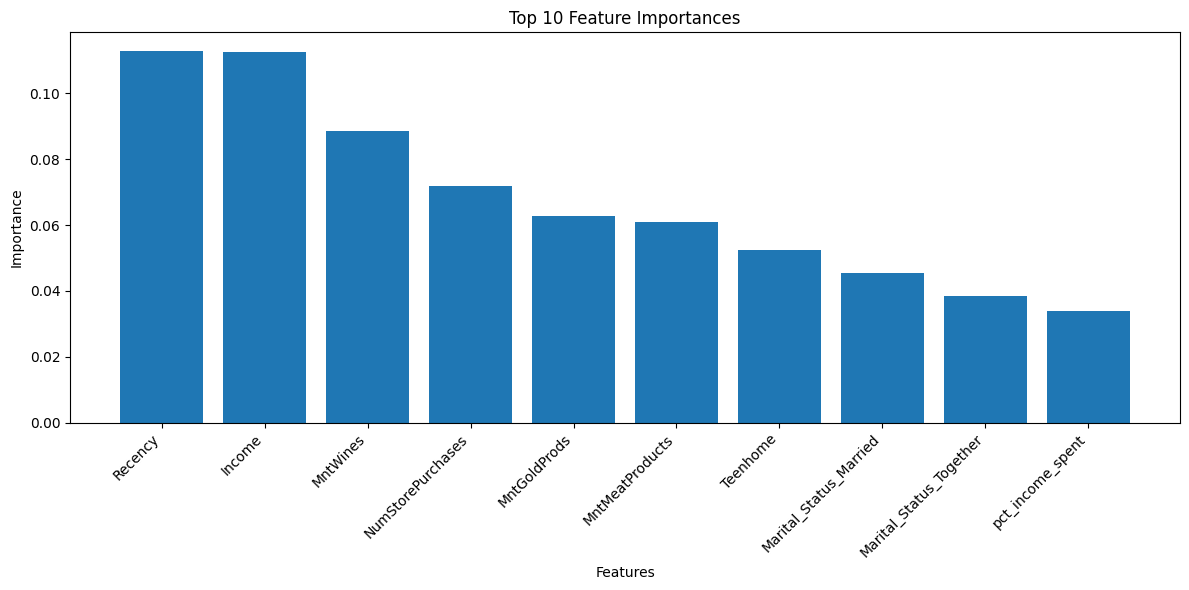

In [31]:
importances = gb_clf.feature_importances_

feature_names = X.columns
feature_importances = dict(zip(feature_names, importances))

import matplotlib.pyplot as plt
import numpy as np

# Sorting the feature importances in descending order
indices = np.argsort(importances)[::-1]
top_10_indices = indices[:10]

# Extracting the names and importance values of these top 10 features.
top_10_feature_names = [feature_names[i] for i in top_10_indices]
top_10_importances = importances[top_10_indices]


# Creating a bar plot
plt.figure(figsize=(12, 6))  # Width, Height in inches

# Title and bar plot
plt.title("Top 10 Feature Importances")
plt.bar(range(10), top_10_importances, align='center')

# Rotate the feature names for better visibility
plt.xticks(range(10), top_10_feature_names, rotation=45, ha='right')

# Adding labels for clarity
plt.xlabel('Features')
plt.ylabel('Importance')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

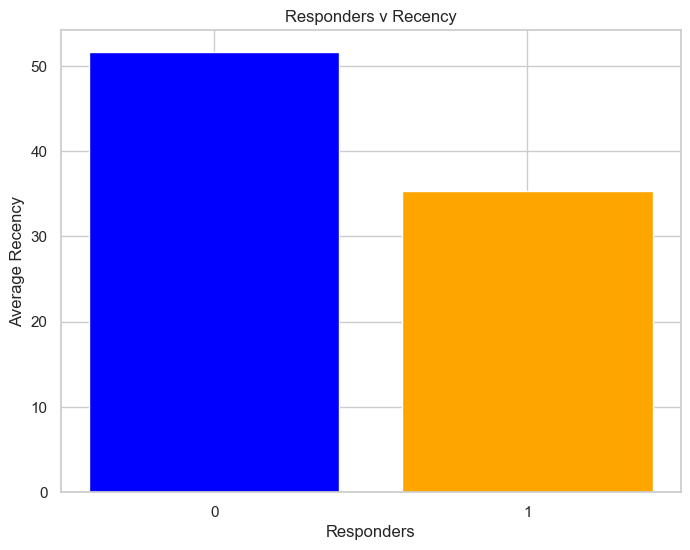

In [78]:
average_times = dummy_df.groupby('Response')['Recency'].mean()

plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.bar(average_times.index, average_times.values, color=['blue', 'orange'])  # You can choose different colors

# Adding labels and title for clarity
plt.xlabel('Responders')
plt.ylabel('Average Recency')
plt.title('Responders v Recency')
plt.xticks([0, 1])  # Assuming labels are 0 and 1

# Show the plot
plt.show()

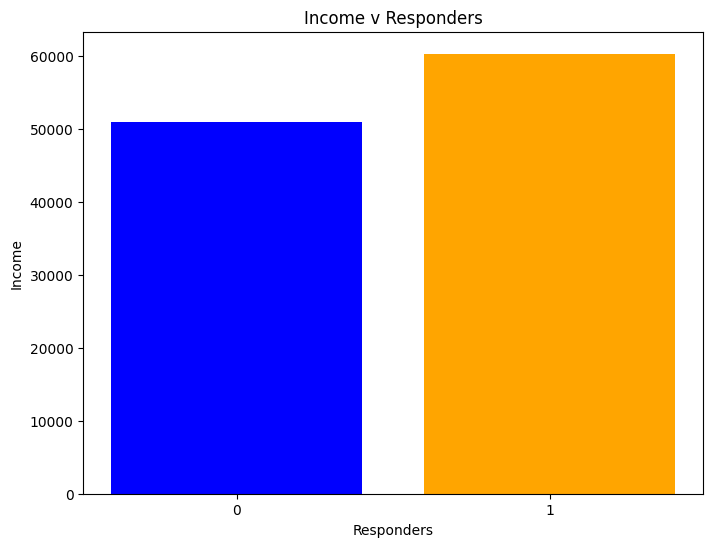

In [38]:
average_times = dummy_df.groupby('Response')['Income'].mean()

plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.bar(average_times.index, average_times.values, color=['blue', 'orange'])  # You can choose different colors

# Adding labels and title for clarity
plt.xlabel('Responders')
plt.ylabel('Income')
plt.title('Income v Responders')
plt.xticks([0, 1])  # Assuming labels are 0 and 1

# Show the plot
plt.show()

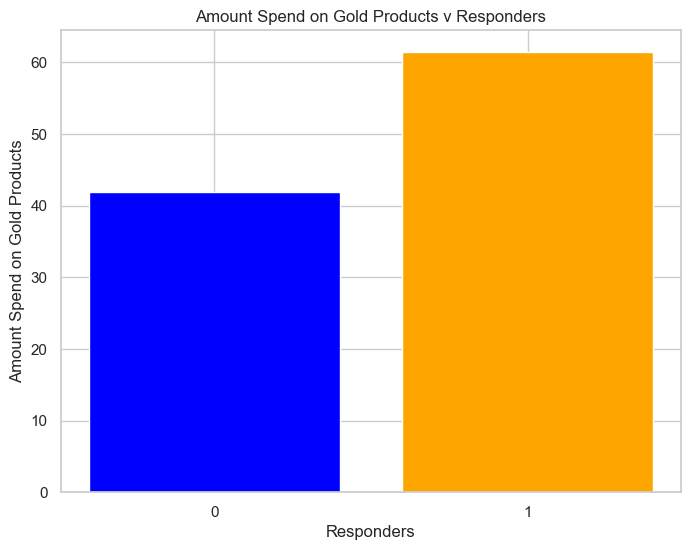

In [77]:
average_times = dummy_df.groupby('Response')['MntGoldProds'].mean()

plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.bar(average_times.index, average_times.values, color=['blue', 'orange'])  # You can choose different colors

# Adding labels and title for clarity
plt.xlabel('Responders')
plt.ylabel('Amount Spend on Gold Products')
plt.title('Amount Spend on Gold Products v Responders')
plt.xticks([0, 1])  # Assuming labels are 0 and 1

# Show the plot
plt.show()

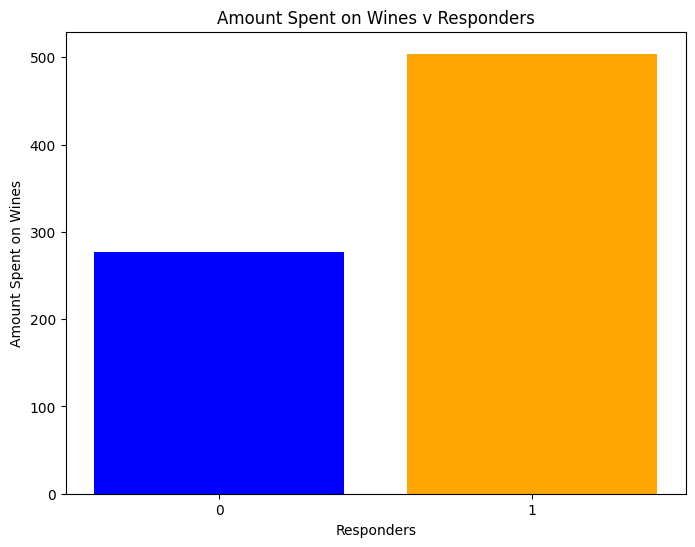

In [36]:
average_times = dummy_df.groupby('Response')['MntWines'].mean()

plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.bar(average_times.index, average_times.values, color=['blue', 'orange'])  # You can choose different colors

# Adding labels and title for clarity
plt.xlabel('Responders')
plt.ylabel('Amount Spent on Wines')
plt.title('Amount Spent on Wines v Responders')
plt.xticks([0, 1])  # Assuming labels are 0 and 1

# Show the plot
plt.show()

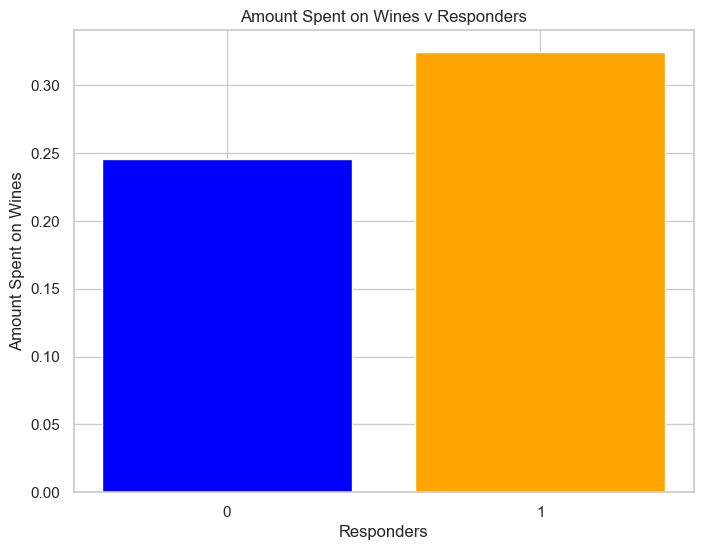

In [46]:
average_times = dummy_df.groupby('Response')['pct_income_spent'].mean()

plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.bar(average_times.index, average_times.values*100, color=['blue', 'orange'])  # You can choose different colors

# Adding labels and title for clarity
plt.xlabel('Responders')
plt.ylabel('Amount Spent on Wines')
plt.title('Amount Spent on Wines v Responders')
plt.xticks([0, 1])  # Assuming labels are 0 and 1

# Show the plot
plt.show()

In [40]:
pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


Non Teen homes have a better chance to respond to the offer

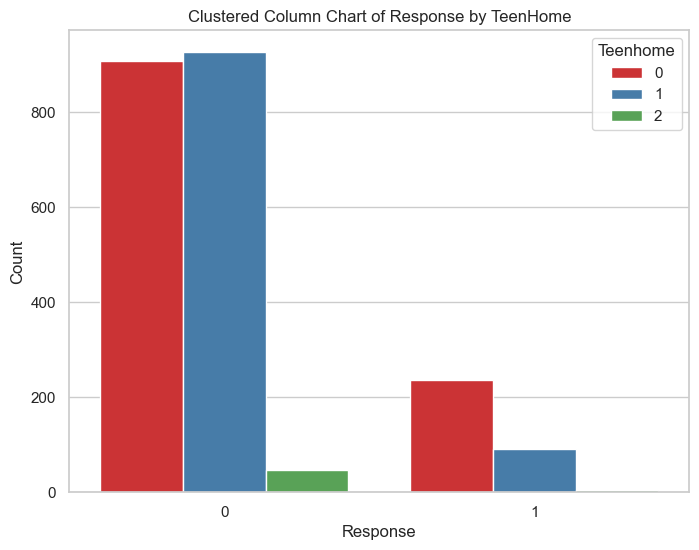

In [43]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Group and count the data
plot_data = df_main.groupby(['Response', 'Teenhome']).size().reset_index(name='Count')

# Create the clustered column chart
sns.barplot(data=plot_data, x='Response', y='Count', hue='Teenhome', palette='Set1')

# Add labels and title
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Clustered Column Chart of Response by TeenHome')

# Show the chart
plt.show()

K means

In [111]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dummy_df)
    sum_of_squared_distances.append(km.inertia_)

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


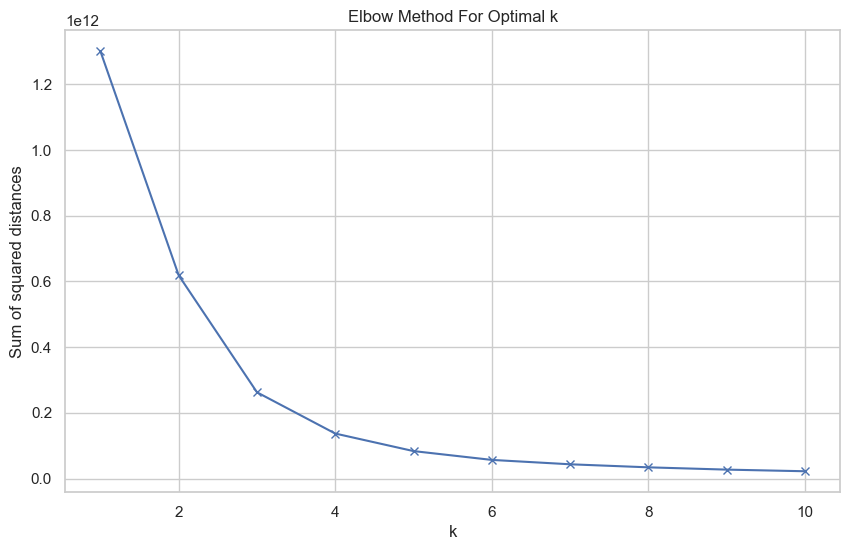

In [112]:
plt.figure(figsize=(10,6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [113]:
from sklearn.cluster import KMeans

# Applying K-Means clustering for k=3, 5, 7
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(dummy_df)
kmeans_3

/Users/sringanesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [114]:
kmeans_3.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

A silhoutte score of 0.61 implies that clusters are well defined

In [117]:
from sklearn.metrics import silhouette_score
score = silhouette_score(dummy_df, kmeans_3.labels_)
score

0.6098178000086317

In [67]:
dummy_df2 = dummy_df
dummy_df2['Cluster'] = kmeans_3.labels_

In [68]:
dummy_df2.Cluster.value_counts()

0    1094
1    1073
2       1
Name: Cluster, dtype: int64

In [69]:
dummy_df2.to_csv('Clustering_Results_V1.csv')

In [70]:
from sklearn.manifold import TSNE

# Applying t-SNE to reduce the data to two dimensions
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(dummy_df)

# Converting the t-SNE output to a DataFrame
tsne_df = pd.DataFrame(data_tsne, columns=['Dimension 1', 'Dimension 2'])

In [71]:
tsne_df['KMeans_3'] = kmeans_3.labels_

Visualization of Clusters

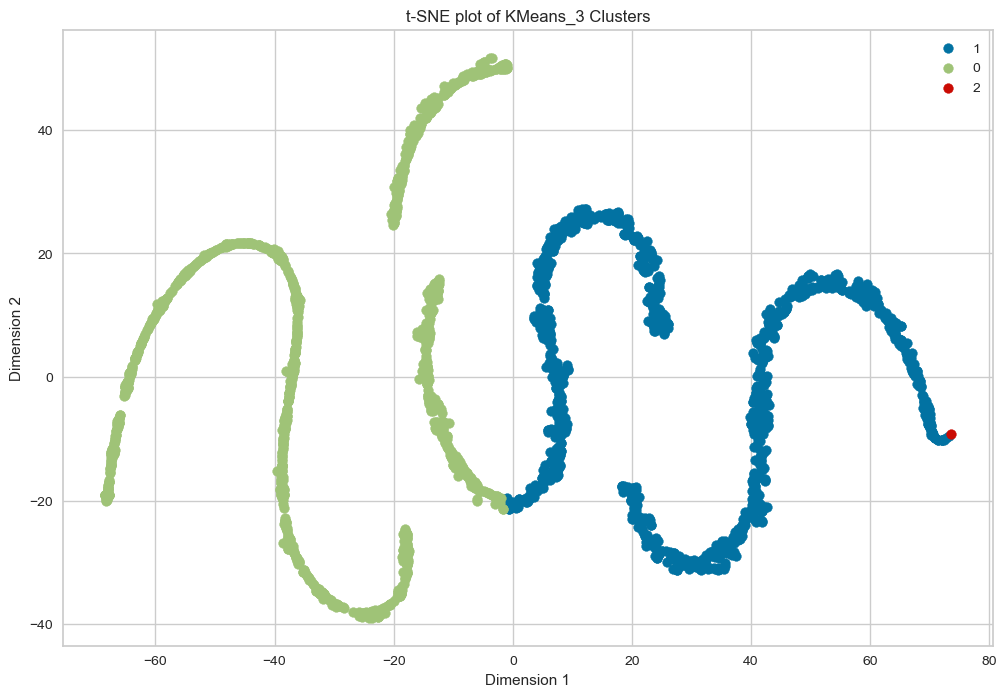

In [72]:

# Plotting the original clusters
plt.figure(figsize=(12, 8))
for cluster in tsne_df['KMeans_3'].unique():
    subset = tsne_df[tsne_df['KMeans_3'] == cluster]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=cluster)
plt.title('t-SNE plot of KMeans_3 Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [47]:
df_main.to_csv('Cleaned_dataSet.csv')

Deciling to extract the gain curve

In [54]:
X_test.drop('scores',axis=1,inplace=True)

In [72]:
# Predicting probabilities
probabilities = gb_clf.predict_proba(X_test)
probabilities[:,1]

array([1.63881134e-01, 9.66372973e-03, 5.82277662e-03, 9.97677653e-01,
       1.17309528e-02, 1.54560440e-01, 9.22022317e-01, 1.32678503e-02,
       9.61175177e-01, 7.79774682e-01, 4.79655435e-01, 4.58239326e-02,
       9.24249416e-01, 6.59485157e-03, 1.29858102e-02, 6.69443513e-01,
       8.62527547e-01, 7.85271595e-03, 4.18484080e-03, 6.61988828e-03,
       9.03375130e-01, 9.92833132e-01, 1.89602531e-02, 2.80785585e-01,
       9.71778803e-04, 3.90098016e-03, 9.89186998e-01, 3.64505794e-01,
       1.89870936e-02, 5.41215382e-01, 1.29234960e-02, 2.44405792e-02,
       3.93734150e-02, 1.61946491e-02, 1.33336632e-02, 3.30955685e-03,
       3.34059055e-01, 3.61798067e-03, 3.00513676e-01, 8.60654228e-03,
       5.35685495e-03, 7.09552877e-01, 8.22616976e-03, 1.05012608e-02,
       1.21706790e-01, 1.33648232e-01, 9.76052097e-01, 2.54262734e-02,
       4.16420530e-01, 9.91413766e-01, 3.50610002e-03, 4.21430818e-01,
       1.23075033e-01, 9.97643256e-01, 7.02381240e-03, 1.44294956e-02,
      

In [73]:
X_test['scores'] = probabilities[:, 1]

In [74]:

# Calculate deciles
X_test['Decile'] = pd.qcut(X_test['scores'], q=10, labels=False)

# Print the DataFrame with deciles
print(X_test[['Decile','scores']])

      Decile    scores
1527       6  0.163881
445        2  0.009664
485        1  0.005823
2181       9  0.997678
1039       2  0.011731
...      ...       ...
39         5  0.064989
1224       5  0.043612
2366       8  0.907301
1376       6  0.207378
951        1  0.005321

[643 rows x 2 columns]


In [75]:
combined_df = pd.concat([X_test, y_test], axis=1)
combined_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Complain_0,Complain_1,scores,Decile,Response
1527,71819.000000,0,1,70,1224,28,140,0,14,168,...,0,0,1,0,0,1,0,0.163881,6,0
445,42169.000000,1,1,20,19,0,9,0,0,2,...,1,0,0,0,0,1,0,0.009664,2,0
485,57236.000000,1,1,22,105,0,9,2,1,4,...,1,0,0,0,0,1,0,0.005823,1,0
2181,82628.116882,0,0,25,1061,58,105,35,86,63,...,0,0,0,0,0,1,0,0.997678,9,1
1039,25410.000000,1,0,48,2,2,4,13,13,4,...,1,0,0,0,0,1,0,0.011731,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,21359.000000,1,0,1,12,2,17,6,1,10,...,0,1,0,0,0,1,0,0.064989,5,1
1224,64014.000000,2,1,56,406,0,30,0,0,8,...,0,0,1,0,0,1,0,0.043612,5,0
2366,63296.302136,0,1,49,927,30,151,21,16,30,...,0,0,0,0,0,1,0,0.907301,8,1
1376,55954.000000,0,1,63,447,0,28,0,0,43,...,1,0,0,0,0,1,0,0.207378,6,0


In [76]:
combined_df.to_csv('Decile_dataset_v2.csv')

In [60]:
X_test.shape

(643, 37)

In [61]:
X_train.shape

(1927, 35)

In [62]:
dummy_df.shape

(2168, 36)

In [63]:
1927+643

2570